In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from cat import Team_A, Team_B

In [2]:
MAXROW = 20
MAXCOL = 30

In [3]:
def processline(linelist):
    newlist = [(int(l.split(",")[0]),int(l.split(",")[1])) for l in linelist[1:]]
    return newlist
    
def read_data(filename):
    file = open(filename,'r')
    data = file.readlines()
    lists = []
    for line in data:
        new_list = processline(line.split(":"))
        lists.append(new_list)
    foodlist = lists [0]
    waterlist = lists [1]
    bedlist = lists [2]
    boxlist = lists [3]
    return foodlist, waterlist, bedlist, boxlist

def move_em(current):
    nextgrid = np.zeros(current.shape, dtype="int16")
    
    for row in range(MAXROW):
        for col in range(MAXCOL):
            for g in range(current[row,col]):
                nextrow = row + random.choice([-1,0,1])
                nextcol = col + random.choice([-1,0,1])
                if nextrow < 0:
                    nextrow = 0
                if nextcol < 0:
                    nextcol = 0
                if nextrow >= MAXROW:
                    nextrow = MAXROW - 1
                if nextcol >= MAXCOL:
                    nextcol = MAXCOL - 1
                nextgrid[nextrow, nextcol] += 1
    return nextgrid

def rule1(pop, datalist, marksList):
    for row in range(MAXROW):
        for col in range(MAXCOL):
            if (row, col) in datalist:
                for g in range(pop[row,col]):
                    pop[row, col] -= 1
                    marksList.append(-5)
                    print("OUTPUT LOG -- TEAM MEMBER OUT")
                    
def rule2(pop, datalist, marksList):
    for row in range(MAXROW):
        for col in range(MAXCOL):
            if (row, col) in datalist:
                for g in range(pop[row,col]):
                    marksList.append(5)
                    print("OUTPUT LOG -- TEAM MEMBER GET ENERGY")
            

def make_feature_scatter(itemlist, colour):
    xlist = []
    ylist = []
    for r,c in itemlist:
        ylist.append(MAXROW - r - 1)  
        xlist.append(c) 
    plt.scatter(xlist,ylist,color=colour, marker='^')
    
def make_my_scatter(pop, dataset, colour):
    xlist = []
    ylist = []
    slist = []
    for row in range(MAXROW):
        for col in range(MAXCOL):
            if pop[row,col] > 0:
                ylist.append(MAXROW - row - 1)  
                xlist.append(col) 
                slist.append(pop[row,col]*20)
    dataset.append([str(xlist), str(ylist)])
    plt.scatter(xlist,ylist,s=slist,color=colour, marker='*')

In [4]:
def ask_questions(questions):
    try:
        loopCount = int(input("\nHOW MANY CATS DO YOU WANT\n "))
        cats_Team_A = []
        answerList_Team_A=[]
        cats_Team_B = []
        answerList_Team_B=[]

        print("\n**********CREATE TEAM A**********\n ")
        for i in range(loopCount):
            for question in questions:
                answer = input(question)
                answerList_Team_A.append(answer)

            if(int(answerList_Team_A[1])==1 and int(answerList_Team_A[2])==1):
                cats_Team_A.append(Team_A(answerList_Team_A[0], "Male", "Friendly"))
            elif(int(answerList_Team_A[1])==2 and int(answerList_Team_A[2])==1):
                cats_Team_A.append(Team_A(answerList_Team_A[0], "Female",  "Friendly"))
            elif(int(answerList_Team_A[1])==1 and int(answerList_Team_A[2])==2):
                cats_Team_A.append(Team_A(answerList_Team_A[0], "Male", "Aggressive"))
            elif(int(answerList_Team_A[1])==2 and int(answerList_Team_A[2])==2):
                cats_Team_A.append(Team_A(answerList_Team_A[0], "Female",  "Aggressive"))
            else:
                cats_Team_A.append(Team_A(answerList_Team_A[0], "NULL",  "NULL"))

            answerList_Team_A.clear()
            loop=-1

        print("\n**********CREATE TEAM B**********\n ")
        for i in range(loopCount):
            for question in questions:
                answer = input(question)
                answerList_Team_B.append(answer)

            if(int(answerList_Team_B[1])==1 and int(answerList_Team_B[2])==1):
                cats_Team_B.append(Team_B(answerList_Team_B[0], "Male", "Friendly"))
            elif(int(answerList_Team_B[1])==2 and int(answerList_Team_B[2])==1):
                cats_Team_B.append(Team_B(answerList_Team_B[0], "Female",  "Friendly"))
            elif(int(answerList_Team_B[1])==1 and int(answerList_Team_B[2])==2):
                cats_Team_B.append(Team_B(answerList_Team_B[0], "Male", "Aggressive"))
            elif(int(answerList_Team_B[1])==2 and int(answerList_Team_B[2])==2):
                cats_Team_B.append(Team_B(answerList_Team_B[0], "Female",  "Aggressive"))
            else:
                cats_Team_B.append(Team_B(answerList_Team_B[0], "NULL",  "NULL"))

            answerList_Team_B.clear()
            loop=-1
        return cats_Team_A, cats_Team_B
    except:
        print("Error! Out of range")

In [11]:
def main():
    print("\n**********WELCOME TO GAME OF CATS**********\n ")
    
    questions = [
     "Cat name?\n",
     "Cat gender?\n(1) Male \n(2) Female\n",
     "Cat temperament?\n(1) Friendly \n(2) Aggressive\n",
    ]

        
    cats_Team_A, cats_Team_B = ask_questions(questions)
    
    marksListA = []
    marksListB = []

    dataset = []
    
    # team initialisation 
    team_A_array = np.zeros((MAXROW,MAXCOL), dtype="int16") 
    team_B_array = np.zeros((MAXROW,MAXCOL), dtype="int16")

    # read the txt file
    food, water, bed, boxes = read_data("cat.txt") 

    # create random team
    for i in cats_Team_A:
        team_A_array[random.randint(0,MAXROW-1),random.randint(0,MAXCOL-1)] += 1 
    for i in cats_Team_B:
        team_B_array[random.randint(0,MAXROW-1),random.randint(0,MAXCOL-1)] += 1 

    # Simulation
    for t in range(30):
        try:
            team_A_next = move_em(team_A_array)
            team_B_next = move_em(team_B_array)

            rule1(team_A_next, bed, marksListA)
            rule1(team_B_next, bed, marksListB)
            
            rule1(team_A_next, boxes, marksListA)
            rule1(team_B_next, boxes, marksListB)
            
            rule2(team_A_next, water, marksListA)
            rule2(team_B_next, water, marksListB)
            
            rule2(team_A_next, food, marksListA)
            rule2(team_B_next, food, marksListB)

            # set movements to the team array
            team_A_array = team_A_next
            team_B_array = team_B_next

            make_my_scatter(team_A_array, dataset, "b")
            make_my_scatter(team_B_array, dataset, "r")
            
            make_feature_scatter(water, "#D4F1F9")
            make_feature_scatter(food, "#00FF00")
            make_feature_scatter(bed, "#FFFF00")
            make_feature_scatter(boxes, "#FFF77D")
            
            plt.title("Cat Simulation (time = " + str(t) + ")")
            plt.xlabel("Columns")
            plt.ylabel("Rows")
            plt.xlim(-1,MAXCOL)
            plt.ylim(-1,MAXROW)
            # save plot
            plt.savefig('CAT_SIMULATION_FIG.png')
            plt.pause(1)
            plt.clf()
            
            print("A Team Score {}".format(sum(marksListA)))
            print("B Team Score {}".format(sum(marksListB)))
        except:
              print("An exception occurred")
                
    if(sum(marksListA)>sum(marksListB)):
        print("A TEAM GAME WON")
    elif(sum(marksListA)==sum(marksListB)):
        print("==GAME DRAW==")
    else:
        print("B TEAM GAME WON")
    
    # dataset save into csv file
    np.savetxt('CAT_SIMULATION_DATASET.csv', np.array(dataset), fmt="%s", delimiter=',')
    print("\nDATASET SAVE INTO CSV FILE")
    print("SAVE PLOT")
    



**********WELCOME TO GAME OF CATS**********
 

HOW MANY CATS DO YOU WANT
 1

**********CREATE TEAM A**********
 
Cat name?
1
Cat gender?
(1) Male 
(2) Female
1
Cat temperament?
(1) Friendly 
(2) Aggressive
1

**********CREATE TEAM B**********
 
Cat name?
1
Cat gender?
(1) Male 
(2) Female
1
Cat temperament?
(1) Friendly 
(2) Aggressive
1


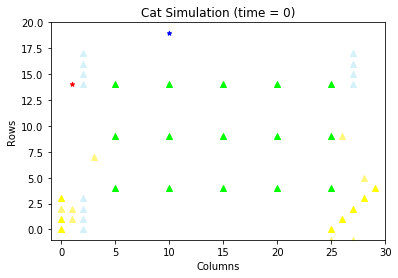

A Team Score 0
B Team Score 0


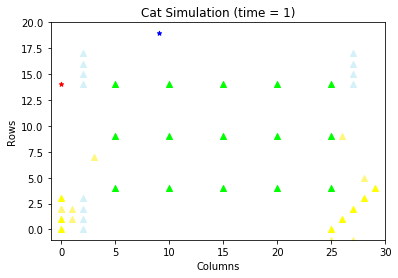

A Team Score 0
B Team Score 0


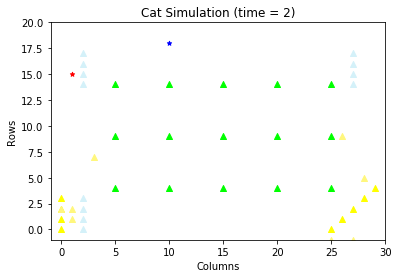

A Team Score 0
B Team Score 0


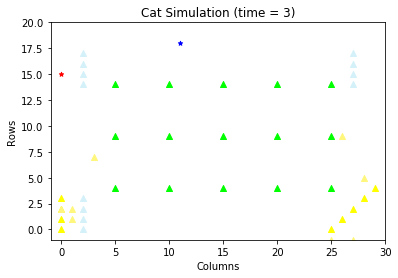

A Team Score 0
B Team Score 0


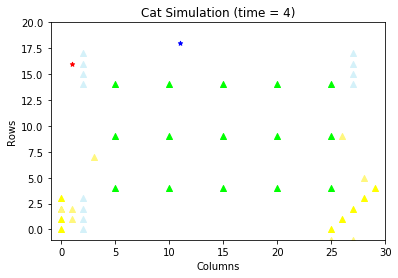

A Team Score 0
B Team Score 0


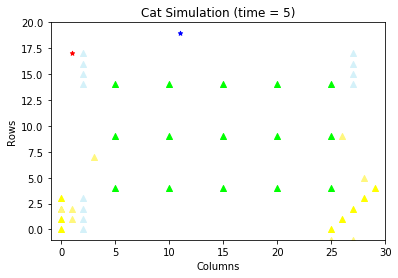

A Team Score 0
B Team Score 0


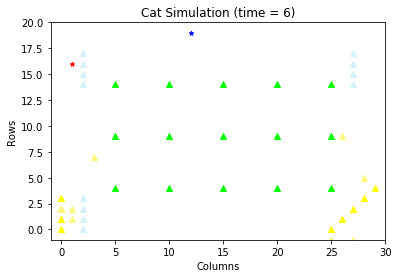

A Team Score 0
B Team Score 0
TEAM MEMBER GET ENERGY


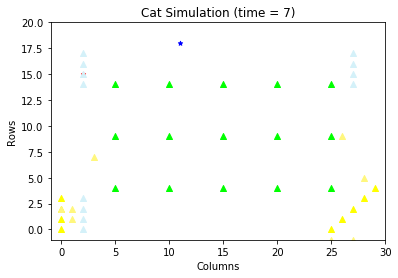

A Team Score 0
B Team Score 5


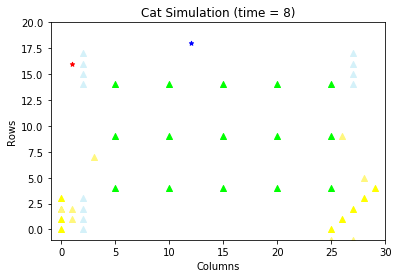

A Team Score 0
B Team Score 5


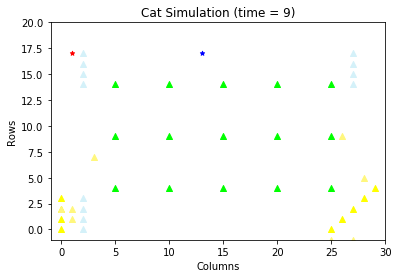

A Team Score 0
B Team Score 5


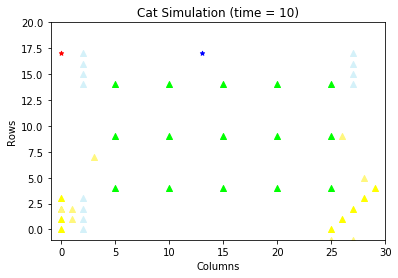

A Team Score 0
B Team Score 5


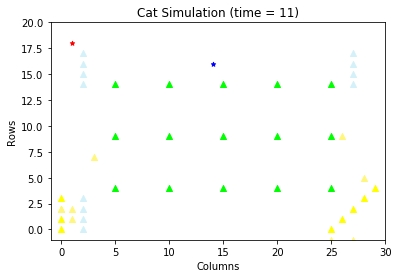

A Team Score 0
B Team Score 5


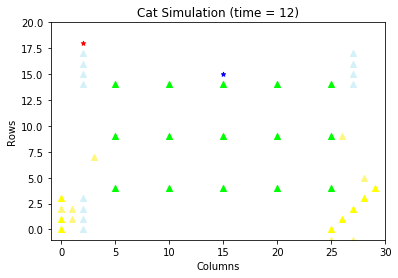

A Team Score 0
B Team Score 5
TEAM MEMBER GET ENERGY


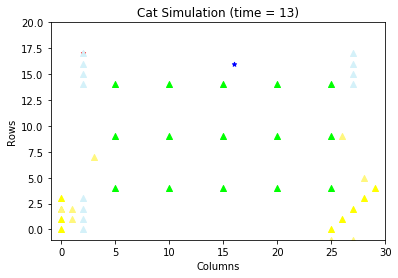

A Team Score 0
B Team Score 10


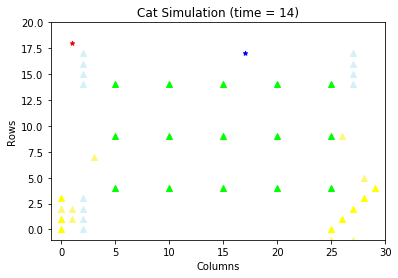

A Team Score 0
B Team Score 10


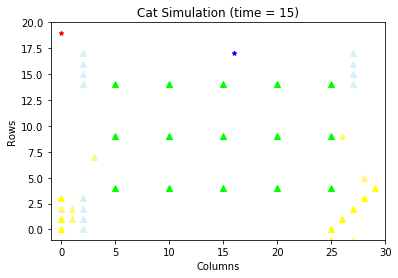

A Team Score 0
B Team Score 10


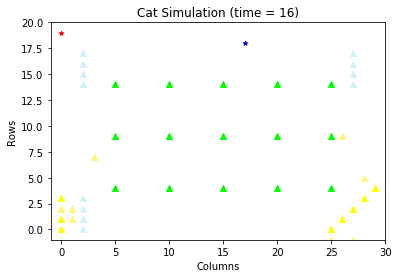

A Team Score 0
B Team Score 10


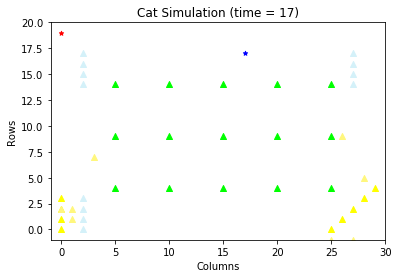

A Team Score 0
B Team Score 10


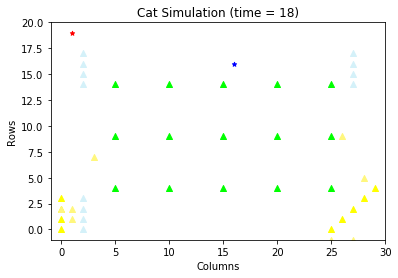

A Team Score 0
B Team Score 10


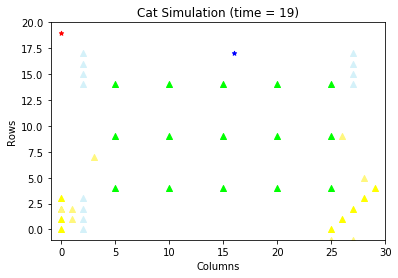

A Team Score 0
B Team Score 10


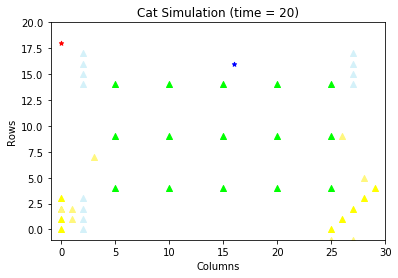

A Team Score 0
B Team Score 10


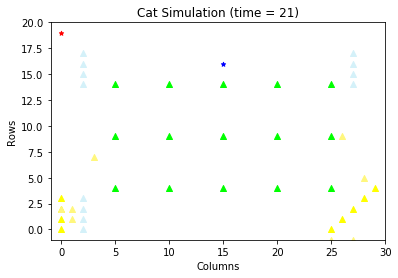

A Team Score 0
B Team Score 10


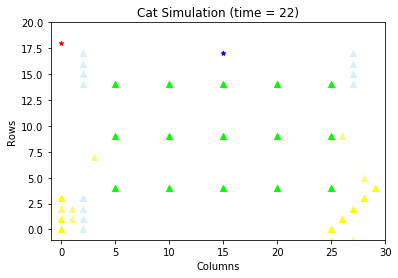

A Team Score 0
B Team Score 10


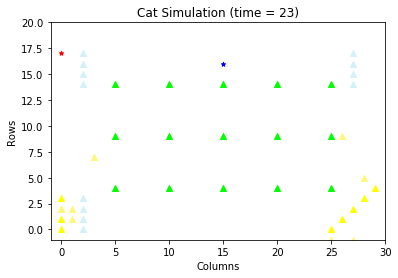

A Team Score 0
B Team Score 10


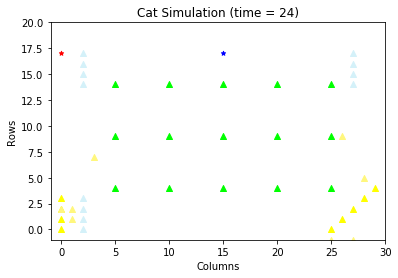

A Team Score 0
B Team Score 10


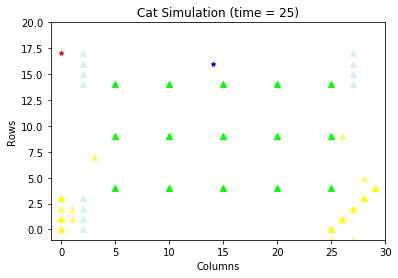

A Team Score 0
B Team Score 10


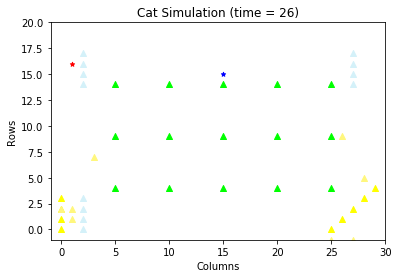

A Team Score 0
B Team Score 10
TEAM MEMBER GET ENERGY


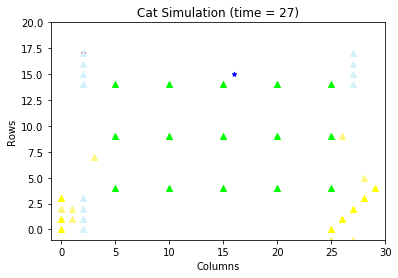

A Team Score 0
B Team Score 15


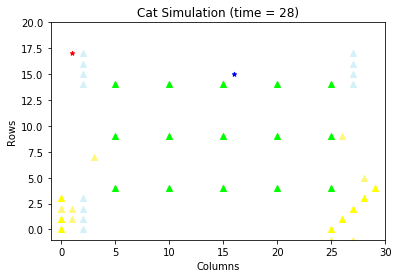

A Team Score 0
B Team Score 15


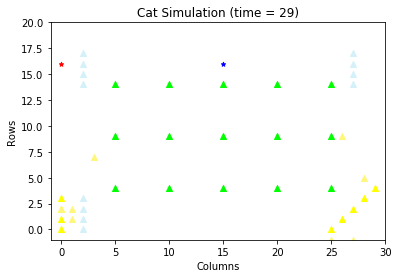

A Team Score 0
B Team Score 15
B TEAM GAME WON
DATASET SAVE INTO CSV FILE
SAVE PLOT


<Figure size 432x288 with 0 Axes>

In [12]:
if __name__ == "__main__":
    main()